In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def Lcalc(data):
    nbrthetas = []
    for d in data:
        select = []
        for dd in data:
            if dd[0] == d[0]: continue
            if dd[1] == d[1]:
                select.append(dd[2])
            for ni in d[3:]:
                if ni == -1.: continue
                if dd[1] == ni:
                    select.append(dd[2])
        nbrthetas.append([d[2], select])

    S, T, L = 0.,0.,0.
    N = 0
    for n in nbrthetas:
        for nn in n[1]:
            S += np.cos(2.*(n[0] - nn))
            T += np.sin(2.*(n[0] - nn))
            N+=1

    S/=N
    T/=N
    L = np.sqrt(S*S + T*T)
    return L, S, T

In [26]:
path = "/home/michael/msc/mcmd/output/"
fnames = ["X", "T", "edgevar/edge15","D"]
maxSnap = 200
L = np.zeros((len(fnames), maxSnap))
S = np.zeros((len(fnames), maxSnap))
T = np.zeros((len(fnames), maxSnap))

In [27]:
iFile = 0
for f in fnames:
    fin = open(path+f, 'r')
    print "File", f
    iSnap = 0
    data = []
    for line in fin.readlines():
        if maxSnap == iSnap: break
        elif line == "\n":
            L[iFile][iSnap], S[iFile][iSnap], T[iFile][iSnap] = Lcalc(data)
            data = []
            if iSnap%(maxSnap/10) == 0: print iSnap
            iSnap += 1
            continue
        else: 
            spt = line.split()
            spt = [float(x) for x in spt]
            data.append([spt[i] for i in [0,1,4,9,10,11,12,13,14,15,16]])

    fin.close()
    iFile += 1

File X
0
20
40
60
80
100
120
140
160
180
File T
0
20
40
60
80
100
120
140
160
180
File edgevar/edge15
0
20
40
60
80
100
120
140
160
180
File D
0
20
40
60
80
100
120
140
160
180


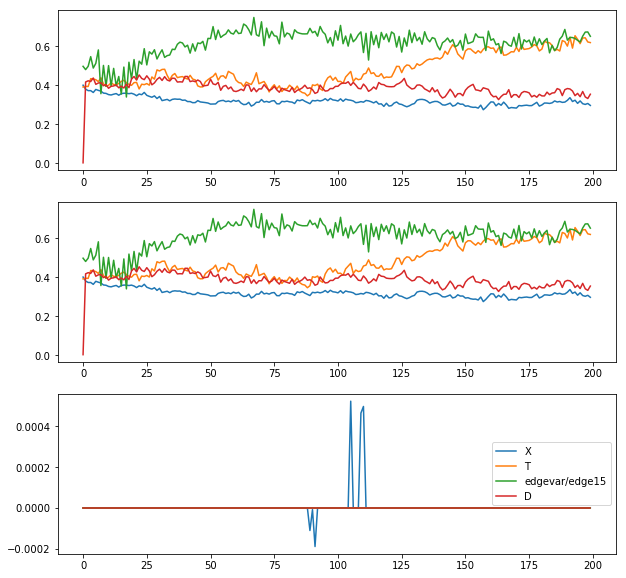

In [52]:
f, ax = plt.subplots(3,1)
for i in range(len(fnames)):
    im0 = ax[0].plot(L[i], label=fnames[i])
    im1 = ax[1].plot(S[i], label=fnames[i])
    im2 = ax[2].plot(T[i], label=fnames[i])

plt.legend(loc=7)
plt.gcf().set_size_inches(10,10)
